In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../data/train.csv', index_col=0, parse_dates=['timestamp'])
train.head()

c:\users\yalex\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,timestamp,electricity,building_name,weather_file,industry,area,primary_space_usage,TemperatureC,month,date,...,weather_file_weather8.csv,weather_file_weather9.csv,industry_Commercial Property,industry_Education,industry_Government,primary_space_usage_Office,primary_space_usage_PrimClass,primary_space_usage_UnivClass,primary_space_usage_UnivDorm,primary_space_usage_UnivLab
9,2015-01-01 07:00:00,27.79,Office_Abbey,weather0.csv,Education,6891.54454,Office,2.8,1,1,...,0,0,0,1,0,1,0,0,0,0
105,2015-01-01 08:00:00,27.66,Office_Abbey,weather0.csv,Education,6891.54454,Office,2.8,1,1,...,0,0,0,1,0,1,0,0,0,0
201,2015-01-01 09:00:00,27.13,Office_Abbey,weather0.csv,Education,6891.54454,Office,3.9,1,1,...,0,0,0,1,0,1,0,0,0,0
297,2015-01-01 10:00:00,27.34,Office_Abbey,weather0.csv,Education,6891.54454,Office,5.0,1,1,...,0,0,0,1,0,1,0,0,0,0
393,2015-01-01 11:00:00,27.34,Office_Abbey,weather0.csv,Education,6891.54454,Office,5.6,1,1,...,0,0,0,1,0,1,0,0,0,0


In [3]:
test = pd.read_csv('../data/test.csv', index_col=0, parse_dates=['timestamp'])
test.head()

,timestamp,electricity,building_name,weather_file,industry,area,primary_space_usage,TemperatureC,month,date,...,weather_file_weather8.csv,weather_file_weather9.csv,industry_Commercial Property,industry_Education,industry_Government,primary_space_usage_Office,primary_space_usage_PrimClass,primary_space_usage_UnivClass,primary_space_usage_UnivDorm,primary_space_usage_UnivLab
24,2015-01-01 07:00:00,5.33,Office_Abigail,weather0.csv,Education,901.437809,Office,2.8,1,1,...,0,0,0,1,0,1,0,0,0,0
120,2015-01-01 08:00:00,5.41,Office_Abigail,weather0.csv,Education,901.437809,Office,2.8,1,1,...,0,0,0,1,0,1,0,0,0,0
216,2015-01-01 09:00:00,5.60,Office_Abigail,weather0.csv,Education,901.437809,Office,3.9,1,1,...,0,0,0,1,0,1,0,0,0,0
312,2015-01-01 10:00:00,6.50,Office_Abigail,weather0.csv,Education,901.437809,Office,5.0,1,1,...,0,0,0,1,0,1,0,0,0,0
408,2015-01-01 11:00:00,5.39,Office_Abigail,weather0.csv,Education,901.437809,Office,5.6,1,1,...,0,0,0,1,0,1,0,0,0,0


In [4]:
#old
# def naive_model_1(df, features):
#     avg = df.groupby(features + ['weekday', 'hour']).mean()
#     profiles = (df.groupby('building_name').first())
#     profiles = profiles.reset_index()
#     profiles = profiles[['building_name', 'weekday', 'hour'] + features].values.tolist()
#     y_pred = []
#     y_observed = []
#     for building, subdf in df.groupby('building_name'):
#         keys = subdf[features + ['weekday', 'hour']].values.tolist()
#         keys = [tuple(key) for key in keys]
#         y_observed.append(np.array(subdf['electricity']))
#         y_pred.append(np.array(avg.loc[keys]['electricity']))
#     return y_observed, y_pred

In [5]:
def naive_model_1(train, test, features):
    avg = train.groupby(features + ['weekday', 'hour']).mean()
    profiles = (test.groupby('building_name').first())
    y_pred = []
    y_observed = []
    for building, subdf in test.groupby('building_name'):
        keys = subdf[features + ['weekday', 'hour']].values.tolist()
        keys = [tuple(key) for key in keys]
        y_observed.append(np.array(subdf['electricity']))
        y_pred.append(np.array(avg.loc[keys]['electricity']))
    return y_observed, y_pred

In [6]:
features = ['primary_space_usage']
y, y_pred = naive_model_1(train, test, features)

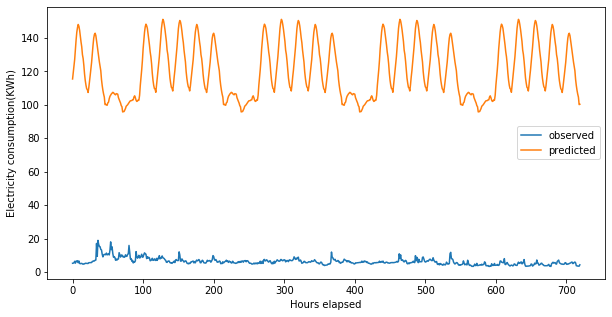

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(y[0][:720], label='observed')
plt.plot(y_pred[0][:720], label='predicted')
plt.ylabel('Electricity consumption(KWh)')
plt.xlabel('Hours elapsed')
plt.legend();

In [8]:
def MAE(y, y_pred):
    s = 0.0
    assert len(y) == len(y_pred)
    for i in range(len(y)):
        s += np.mean(np.abs(y[i] - y_pred[i]))
    return s / len(y)
MAE(y, y_pred)

109.15599557895243

In [9]:
def MSE(y, y_pred):
    s = 0.0
    assert len(y) == len(y_pred)
    for i in range(len(y)):
        s += np.mean(np.square(y[i] - y_pred[i]))
    return s / len(y)
MSE(y, y_pred)

70129.18974059835

In [10]:
def NMBE(y, y_pred):
    assert len(y) == len(y_pred)
    res = np.array([])
    for i in range(len(y)):
        res = np.append(res, np.mean(y[i] - y_pred[i])*100/np.mean(y[i]))
    return res
nmbe = NMBE(y, y_pred)

In [11]:
def CVRMSE(y, y_pred):
    assert len(y) == len(y_pred)
    res = np.array([])
    for i in range(len(y)):
        res = np.append(res, np.sqrt(np.mean(np.square(y[i] - y_pred[i])))*100/np.mean(y[i]))
    return res
cvrmse = CVRMSE(y, y_pred)

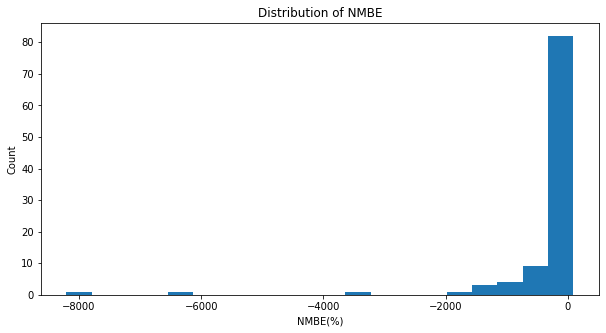

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(nmbe, bins=20)
plt.title('Distribution of NMBE')
plt.xlabel('NMBE(%)')
plt.ylabel('Count');

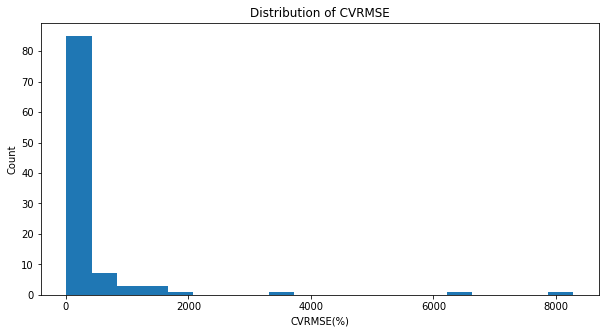

In [27]:
plt.figure(figsize=(10, 5))
plt.hist(cvrmse, bins=20)
plt.title('Distribution of CVRMSE')
plt.xlabel('CVRMSE(%)')
plt.ylabel('Count');

In [32]:
def diff_USD(y, y_pred):
    assert len(y) == len(y_pred)
    res = np.array([])
    for i in range(len(y)):
        val = 0.16 * np.sum(y[i]-y_pred[i])
        res = np.append(res, val)
    return res

In [33]:
diff_USD(y, y_pred)

array([-1.55931484e+05,  3.44855202e+03, -1.42935270e+05,  3.62901164e+04,
       -6.37249109e+04,  3.81099030e+04,  1.48153501e+05, -1.60536737e+05,
       -1.19648435e+05,  1.35426069e+05, -1.52539450e+05,  2.55650677e+05,
       -7.03959790e+04, -1.66068492e+05, -1.66659868e+05, -3.90361418e+04,
        1.90583066e+05,  8.26617746e+04, -1.18785741e+05, -4.67087936e+04,
       -7.30257468e+04, -1.12311210e+05, -1.23007987e+05, -1.13593456e+05,
       -4.47010040e+04,  1.14929760e+05, -4.08274073e+04, -8.04485579e+04,
       -6.39375005e+04, -1.17703039e+05, -1.07416634e+05, -4.57874570e+04,
       -1.56657193e+05, -1.42677764e+04, -1.46604348e+04, -3.42207805e+03,
       -6.12487237e+03, -1.33310642e+04, -1.18506892e+04, -1.31922756e+04,
        7.52086605e+04, -1.38151162e+04, -2.11806224e+04, -1.76969048e+04,
       -1.04447347e+04, -1.67956831e+04, -7.54575294e+03, -1.05245715e+04,
       -1.78357768e+04,  4.48865491e+04,  1.30956193e+05,  2.86373371e+05,
        5.67223402e+02,  